In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [4]:
@staticmethod
def factor(df):
    '''能量潮指标：累积成交量平衡'''
    obv = (np.sign(df['close'].diff()) * df['volume'])
    obv = obv.cumsum()
    return obv

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): -0.003171
   Rank_IC (Spearman): -0.010220
📊 信息比率:
   IR: 0.067035
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 131034
   因子列: factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


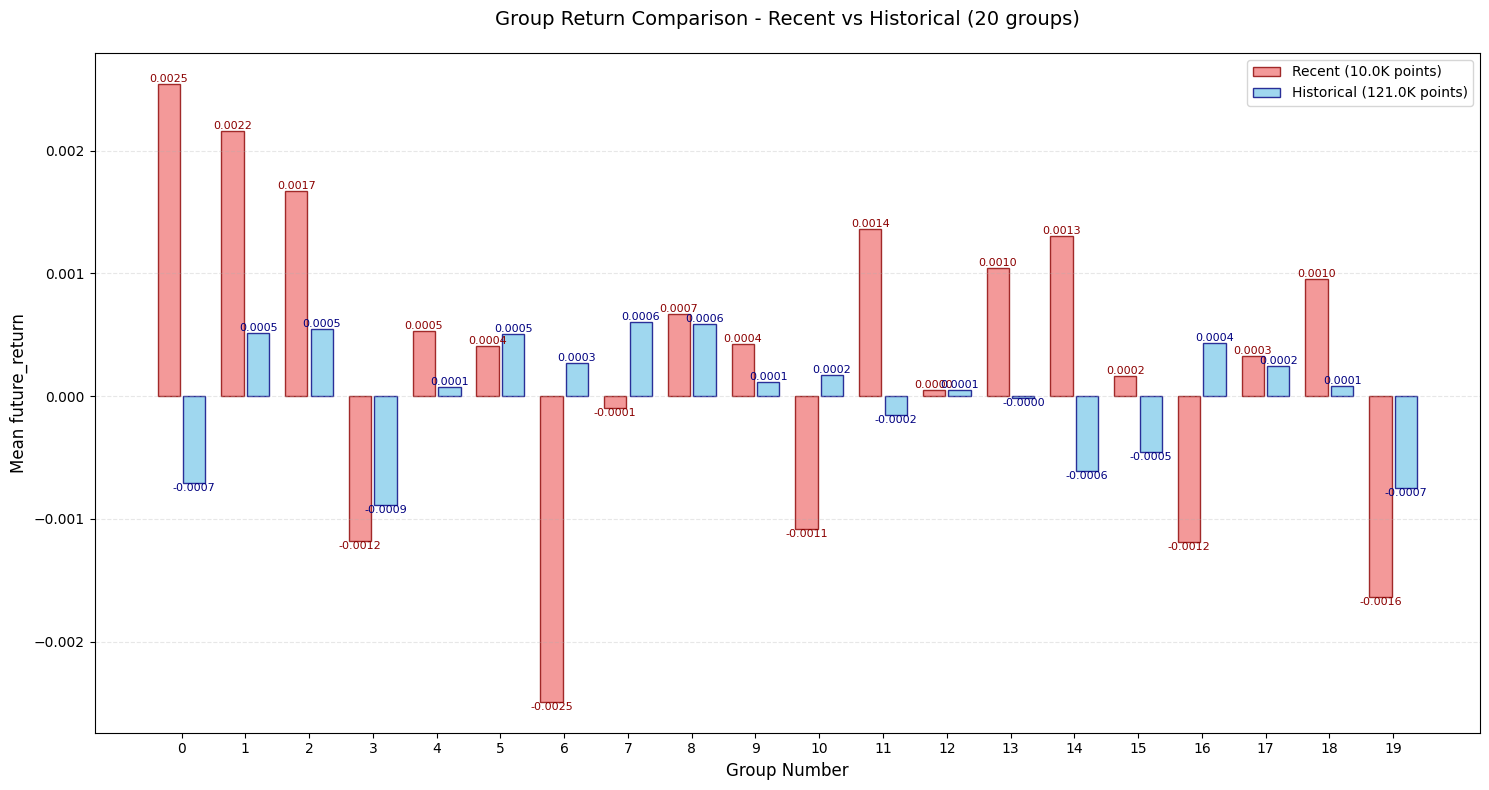

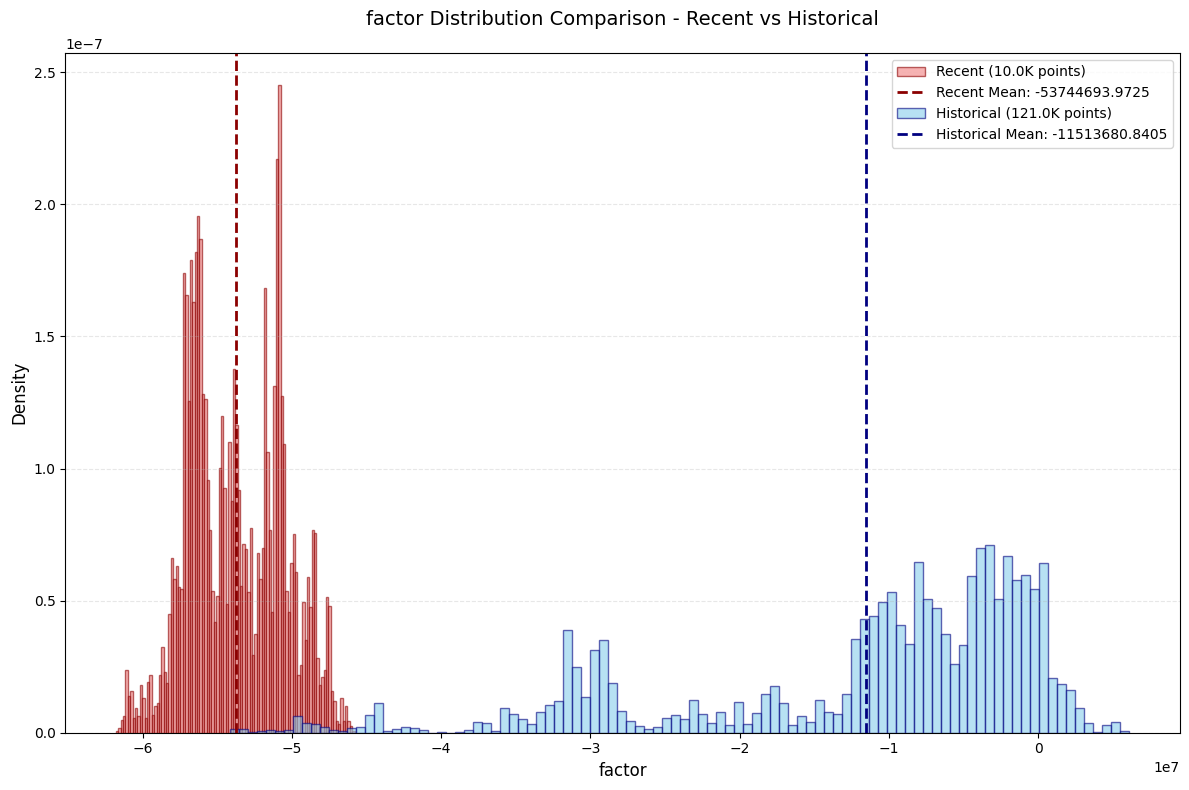

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [5]:
evaluator.set_factor(
    factor_func=factor,
    factor_name='factor'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

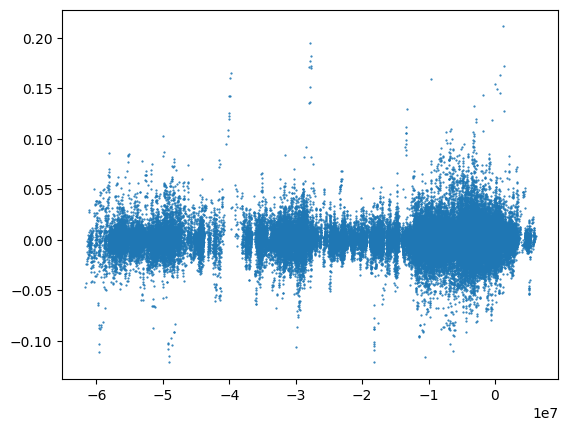

In [6]:
import matplotlib.pyplot as plt
plt.scatter(factor(df),df['close'].pct_change(-10), s=0.3)

In [7]:
result['information_ratio']['group_correlations']
# 这表示不同分组之间的相关性，通常用于评估因子在不同市场状态下的表现一致性。
# 如果相关性较高，说明因子在不同市场状态下表现一致；如果相关性较低，说明因子在不同市场状态下表现差异较大。

[-0.037157401882689636,
 0.052392558487833224,
 0.03559431147959623,
 0.009282360237087506,
 -0.005170965896223072,
 -0.02094578549072804,
 -0.005239509247547944,
 -0.006181212674942886,
 0.028220129988923162,
 -0.032072872117213005]

In [8]:
print(result)

{'correlation_analysis': {'IC': -0.0031705319731456594, 'Rank_IC': -0.010219678594554292}, 'information_ratio': {'IR': 0.06703460179170703, 'group_correlations': [-0.037157401882689636, 0.052392558487833224, 0.03559431147959623, 0.009282360237087506, -0.005170965896223072, -0.02094578549072804, -0.005239509247547944, -0.006181212674942886, 0.028220129988923162, -0.032072872117213005], 'n_groups': 10}, 'group_analysis': {'group_stats':              val_min        val_max       val_mean  return_mean  return_std  \
group                                                                         
0     -61783398.4840 -52187685.4290 -55712934.7387       0.0004      0.0123   
1     -52186280.8830 -44114307.1440 -48809641.1647      -0.0002      0.0138   
2     -44113471.9770 -31630300.1020 -34746397.3856       0.0001      0.0129   
3     -31630220.5320 -29462229.6020 -30599375.2556       0.0004      0.0101   
4     -29462199.0440 -23790618.0380 -27867063.2313      -0.0006      0.0124   
5     -2